<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; min-width: 250px; display: flex; justify-content: center;">
        <img src="https://adnova.novaims.unl.pt/media/22ui3ptm/logo.svg" style="max-width: 80%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style='color:#6f800f'> Data Mining Project | </span>
            <span style='color:#393B79'>ABCDEats Inc.</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Filipa Pereira, 20240509</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#6f800f, #393B79); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## **📚 Libraries Import**

In [2]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap

# For HC + K-Means Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# For SOM Clustering
from minisom import MiniSom
from scipy.cluster.hierarchy import dendrogram, linkage

## Import Matplotlib functions to create MiniSOM visualizations
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors
from matplotlib.colors import LinearSegmentedColormap

from matplotlib.lines import Line2D
import seaborn as sns

from matplotlib import __version__ as mplver

# Set the style of the visualization
pd.set_option('display.max_columns', None)                  # display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #6f800f,#393B79); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 2 | SOM - Self Organizing Maps </b></h1></center>
</div>

## **🧮 Import Data**

In [3]:
# Importing the dataset after the preprocessing
ABCDEats = pd.read_parquet('data/DM2425_ABCDEats_preprocessed.parquet')

In [4]:
# Display the first 5 rows just to confirm the import was successful
ABCDEats.head() 

,customer_region,customer_age,vendor_count,product_count,chain_count,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,order_count,customer_region_buckets,customer_age_group,days_between_orders,days_between_orders_per_order,last_promo_bin,CUI_Total_Amount_Spent,CUI_Most_Spent_Cuisine,CUI_Total_Food_Types,CUI_Avg_Amount_Spent,last_promo_bin_True,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_NO PROMO,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,customer_region_buckets_4,customer_region_buckets_8,customer_region_buckets_U,payment_method_CASH,payment_method_DIGI,CUI_Most_Spent_Cuisine_Asian,CUI_Most_Spent_Cuisine_Beverages,CUI_Most_Spent_Cuisine_Cafe,CUI_Most_Spent_Cuisine_Chicken Dishes,CUI_Most_Spent_Cuisine_Chinese,CUI_Most_Spent_Cuisine_Desserts,CUI_Most_Spent_Cuisine_Healthy,CUI_Most_Spent_Cuisine_Indian,CUI_Most_Spent_Cuisine_Italian,CUI_Most_Spent_Cuisine_Japanese,CUI_Most_Spent_Cuisine_Noodle Dishes,CUI_Most_Spent_Cuisine_OTHER,CUI_Most_Spent_Cuisine_Street Food / Snacks,CUI_Most_Spent_Cuisine_Thai,CUI_Italian_OTHER_PC,CUI_Chicken_Noodle_PC,CUI_Mixed_PC,CUI_American_Healthy_PC,CUI_Indian_PC,CUI_Japanese_PC,CUI_Beverages_PC,CUI_Desserts_PC,CUI_Thai_PC,CUI_Chinese_PC,CUI_Cafe_PC,CUI_Asian_StreetFood/Snacks_PC,HR_Lunch_Dinner_PC,HR_LateNight_PC,HR_Breakfast_PC,HR_AfternoonSnack_PC
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.00,2,5,1,0.00,1,DELIVERY,DIGI,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.88,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,2,1,1.00,0.50,True,28.88,Indian,1,14.44,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.06,-0.38,-1.66,0.73,3.14,0.95,-0.67,-1.01,-1.67,1.51,-0.36,-1.21,-0.28,-0.68,-0.71,-0.59
5d272b9dcb,8670,17.00,2,2,2,0.00,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,8,1,1.00,0.50,True,19.21,American,2,9.61,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.30,-0.38,-0.29,-0.38,-0.32,-0.36,0.14,-0.39,-0.41,-0.28,0.53,0.11,-0.58,-0.42,0.12,-0.50
f6d1b2ba63,4660,38.00,1,2,2,0.00,1,DISCOUNT,CASH,9.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,4,2,1.00,0.50,True,9.20,American,1,4.60,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.17,-0.22,-0.58,-0.18,-0.30,-0.30,0.11,-0.10,-0.26,-0.30,0.37,-0.06,-0.61,-0.37,0.27,-0.39
180c632ed8,4660,24.00,2,3,1,0.00,2,DELIVERY,DIGI,0.00,13.70,0.00,0.00,0.00,0.00,0.00,0.00,17.86,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,4,1,2.00,1.00,True,31.56,Indian,2,15.78,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21,-0.33,-1.02,0.53,1.87,0.77,-0.46,-0.89,-1.05,1.15,-0.11,-0.19,-0.29,-0.47,-0.23,-0.15
4eb37a6705,4660,20.00,2,5,0,0.00,2,NO PROMO,DIGI,14.57,40.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,

In [5]:
# Number of rows and columns
print('Number of\033[1m rows \033[0m:', ABCDEats.shape[0])
print('Number of\033[1m columns \033[0m:', ABCDEats.shape[1])

Number of rows : 30169
Number of columns : 112


In [6]:
# Check the data types
ABCDEats.dtypes

customer_region                    object
customer_age                      float64
vendor_count                        int64
product_count                       int64
chain_count                         int64
                                   ...   
CUI_Asian_StreetFood/Snacks_PC    float64
HR_Lunch_Dinner_PC                float64
HR_LateNight_PC                   float64
HR_Breakfast_PC                   float64
HR_AfternoonSnack_PC              float64
Length: 112, dtype: object

---

In [7]:
# Create a continuous and discrete colormap
colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F"]
NOVAIMS_palette_colors = sns.color_palette(colors[::-1], as_cmap=True)

colors = ["#3E460F", "#4E5813", "#626E18", "#7A891E", "#98AB26", "#BED62F", "#FFFFFF"]
NOVAIMS_palette_colors_continuous = LinearSegmentedColormap.from_list("NOVAIMS_palette", colors[::-1])

In [8]:
list(ABCDEats.columns)

['customer_region',
 'customer_age',
 'vendor_count',
 'product_count',
 'chain_count',
 'first_order',
 'last_order',
 'last_promo',
 'payment_method',
 'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'DOW_0',
 'DOW_1',
 'DOW_2',
 'DOW_3',
 'DOW_4',
 'DOW_5',
 'DOW_6',
 'HR_0',
 'HR_1',
 'HR_2',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23',
 'order_count',
 'customer_region_buckets',
 'customer_age_group',
 'days_between_orders',
 'days_between_orders_per_order',
 'last_promo_bin',
 'CUI_Total_Amount_Spent',
 'CUI_Most_Spent_Cuisine',
 'CUI_Total_Food_Types',
 'CUI_Avg_Amount_Spent',
 'last_promo_bin_True',
 'last_promo_DI

<div class="alert alert-block alert-danger" style="font-size:20px;">

> **🛑 Warning:** Ainda nos falta tirar as variáveis ***multicolineares*** e ***irrelevantes*** do nosso dataset.

In [9]:
# Define metric and non-metric features
metric_features = [
    'customer_age', 'vendor_count', 'product_count', 'chain_count', 'first_order', 'last_order',
    'order_count', 
    'days_between_orders', 
    'days_between_orders_per_order',
    'last_promo_bin',
    'CUI_Total_Amount_Spent',
    'CUI_Total_Food_Types',
    'CUI_Avg_Amount_Spent',
    
    # Principal Components [CUI] 
    'CUI_Italian_OTHER_PC',
    'CUI_Chicken_Noodle_PC',
    'CUI_Mixed_PC',
    'CUI_American_Healthy_PC',
    'CUI_Indian_PC',
    'CUI_Japanese_PC',
    'CUI_Beverages_PC',
    'CUI_Desserts_PC',
    'CUI_Thai_PC',
    'CUI_Chinese_PC',
    'CUI_Cafe_PC',
    'CUI_Asian_StreetFood/Snacks_PC',
    
    # Original [DOW]
    'DOW_0',
    'DOW_1',
    'DOW_2',
    'DOW_3',
    'DOW_4',
    'DOW_5',
    'DOW_6',
    
    # Principal Components [HR]
    'HR_Lunch_Dinner_PC',
    'HR_LateNight_PC',
    'HR_Breakfast_PC',
    'HR_AfternoonSnack_PC'
]

# Non-metric columns
non_metric_features = [
    'customer_age_group', 'customer_region_buckets', 'customer_region', 
    'last_promo', 'payment_method', 'CUI_Most_Spent_Cuisine',
]

print(f'Metric columns: {len(metric_features)}, {metric_features} \n')
print(f'Non-Metric columns: {len(non_metric_features)}, {non_metric_features}')

Metric columns: 36, ['customer_age', 'vendor_count', 'product_count', 'chain_count', 'first_order', 'last_order', 'order_count', 'days_between_orders', 'days_between_orders_per_order', 'last_promo_bin', 'CUI_Total_Amount_Spent', 'CUI_Total_Food_Types', 'CUI_Avg_Amount_Spent', 'CUI_Italian_OTHER_PC', 'CUI_Chicken_Noodle_PC', 'CUI_Mixed_PC', 'CUI_American_Healthy_PC', 'CUI_Indian_PC', 'CUI_Japanese_PC', 'CUI_Beverages_PC', 'CUI_Desserts_PC', 'CUI_Thai_PC', 'CUI_Chinese_PC', 'CUI_Cafe_PC', 'CUI_Asian_StreetFood/Snacks_PC', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_Lunch_Dinner_PC', 'HR_LateNight_PC', 'HR_Breakfast_PC', 'HR_AfternoonSnack_PC'] 

Non-Metric columns: 6, ['customer_age_group', 'customer_region_buckets', 'customer_region', 'last_promo', 'payment_method', 'CUI_Most_Spent_Cuisine']


In [10]:
# List of weekdays (0 = Sunday, 6 = Saturday)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekdays_dict = dict(enumerate(weekdays))
weekdays_dict

{0: 'Sunday',
 1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday'}

---

## **⚫🟢⚪ Clustering**

#### **Self Organizing Maps (MiniSOM) [<sup>[5]</sup>](https://github.com/JustGlowing/minisom)**

In [ ]:
# ================================================== [AUXILIARY FUNCTIONS] ==================================================
# Some helper functions
def tidy_ax(ax, major_ticks, minor_ticks, minor_lim=None):
    ax.set_xticks(major_ticks-.5)
    ax.set_xticks(minor_ticks-.5, minor=True)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='both', alpha=0.5, color='white', linewidth=1)
    ax.tick_params(axis='both', which='both', direction="in", width=0, length=0)
    if minor_lim == None:
        minor_lim = major_ticks.max()
    ax.set_yticks(major_ticks[major_ticks<minor_lim]-.5, )
    ax.set_yticks(minor_ticks[minor_ticks<minor_lim]-.5, minor=True)
    ax.set_aspect(1)
    return ax

# Visualizing data with SOMs
def plot_hexagons(som,              # Trained SOM model 
                  sf,               # Matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Grays,    # colormap to use
                  annot=False       
                  ):
    axs = sf.subplots(1,1)
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):
            wx, wy = som.convert_map_to_euclidean((i,j)) 
            hex = RegularPolygon((wx, wy), numVertices=6, radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, edgecolor='white', linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, ha='center', va='center', fontsize='x-small')
    ## Remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label, fontweight='bold')
    ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")
    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])
    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb, orientation='vertical', alpha=1, mappable=cmap_sm)
    cb1.ax.get_yaxis().labelpad = 6
    # Add colorbar to plot
    sf.add_axes(ax_cb)
    return sf

In [20]:
# Apply the SOM algorithm
M = 10
N = 10
neighborhood_function = 'gaussian' 
topology = "hexagonal"
n_feats = len(metric_features)
learning_rate = .7

# Convert metric_features to 'float' type
ABCDEats[metric_features] = ABCDEats[metric_features].astype('float')
som_data = ABCDEats[metric_features].values # Data for SOM

sm = MiniSom(M, N,              # 10x10 map size
             n_feats,           # Number of the elements of the vectors in input.
             learning_rate=learning_rate, 
             topology=topology, 
             neighborhood_function=neighborhood_function, 
             activation_distance='euclidean',
             random_seed=42)

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(som_data)


print("Before training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))



# Trains the SOM using all the vectors in data sequentially
# minisom does not distinguish between unfolding and fine tuning phase;

sm.train_batch(som_data, 20000, verbose=True)

print("After training:")
print("QE", np.round(sm.quantization_error(som_data),4))
print("TE", np.round(sm.topographic_error(som_data),4))

# What are these weights?
weights = sm.get_weights()
weights.shape

Before training:
QE 16.0667


c:\Anaconda3\envs\DM2425\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


TE 0.9307
 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 28.752654549392147
After training:
QE 28.7527
TE 0.5128


(10, 10, 36)

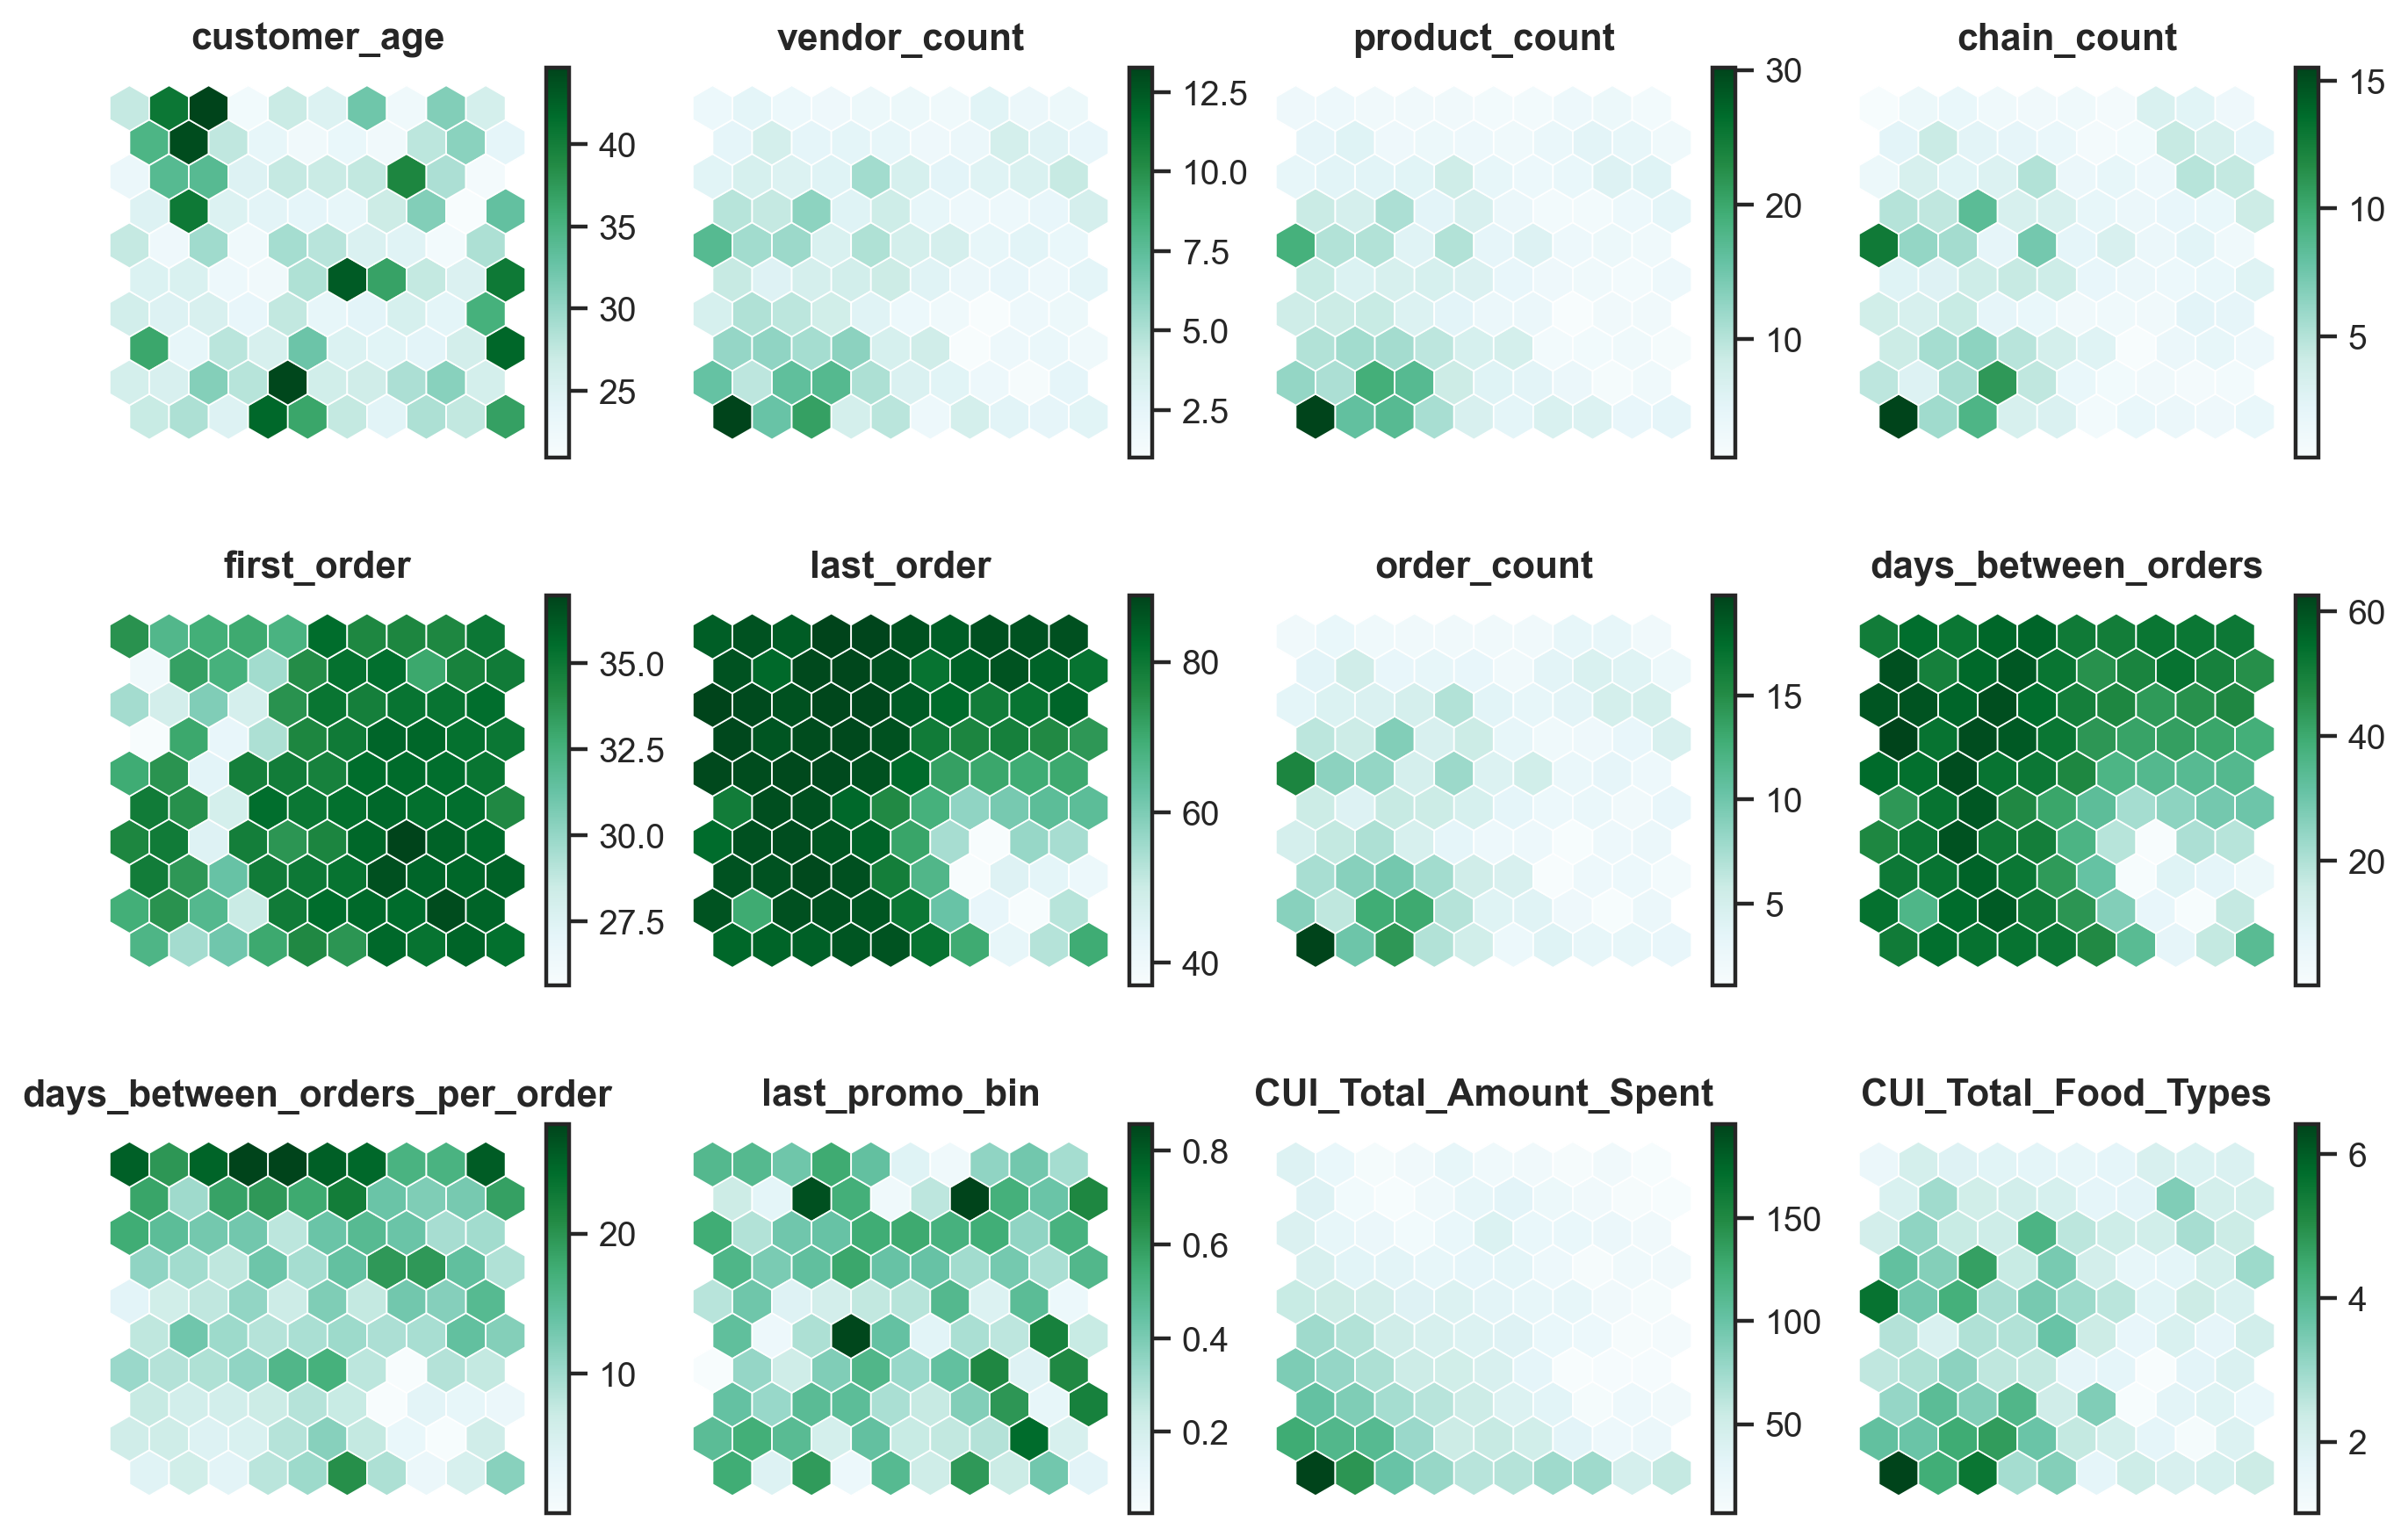

In [34]:
##############################
# Plot Component Planes
##############################

figsize=(10,7)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128, )

subfigs = fig.subfigures(3,4,wspace=.15)

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(metric_features)), subfigs.flatten()):
    
    matrix_vals = weights[:,:,cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)


    sf = plot_hexagons(sm, sf, 
                    colornorm,
                    matrix_vals,
                    label=metric_features[cpi],
                    cmap=cm.BuGn)

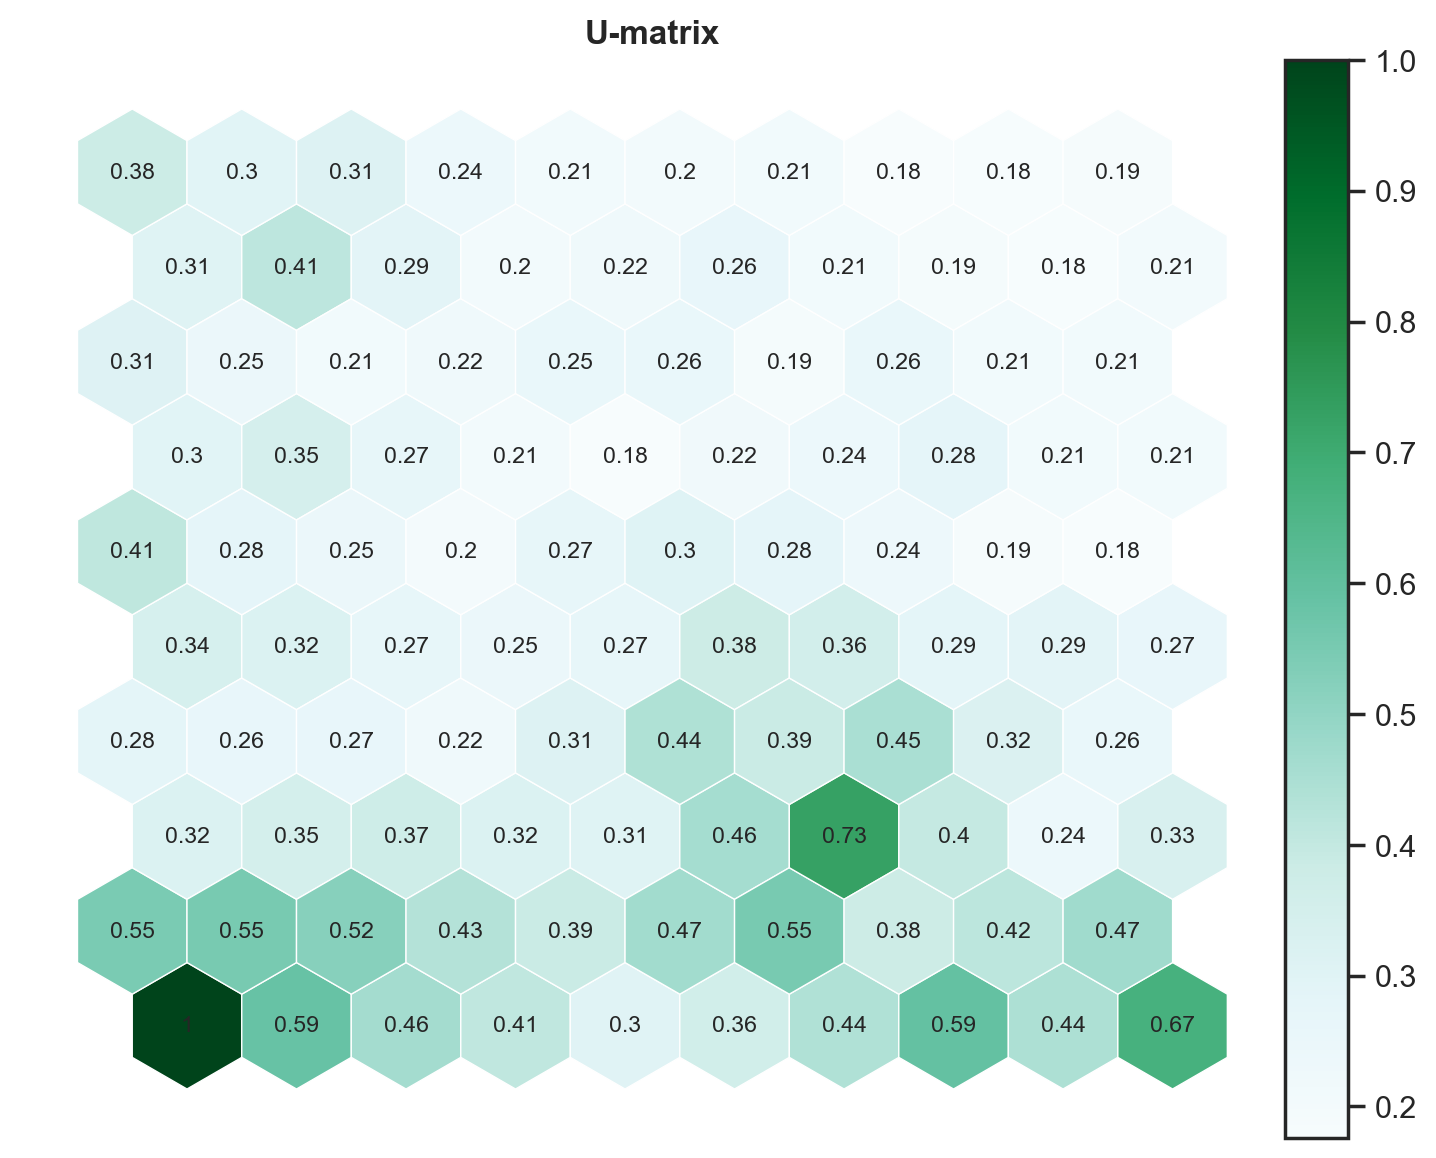

In [35]:
##############################
# U-Matrix
##############################

umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    umatrix,
                    label="U-matrix",
                    cmap=cm.BuGn,
                    annot=True)

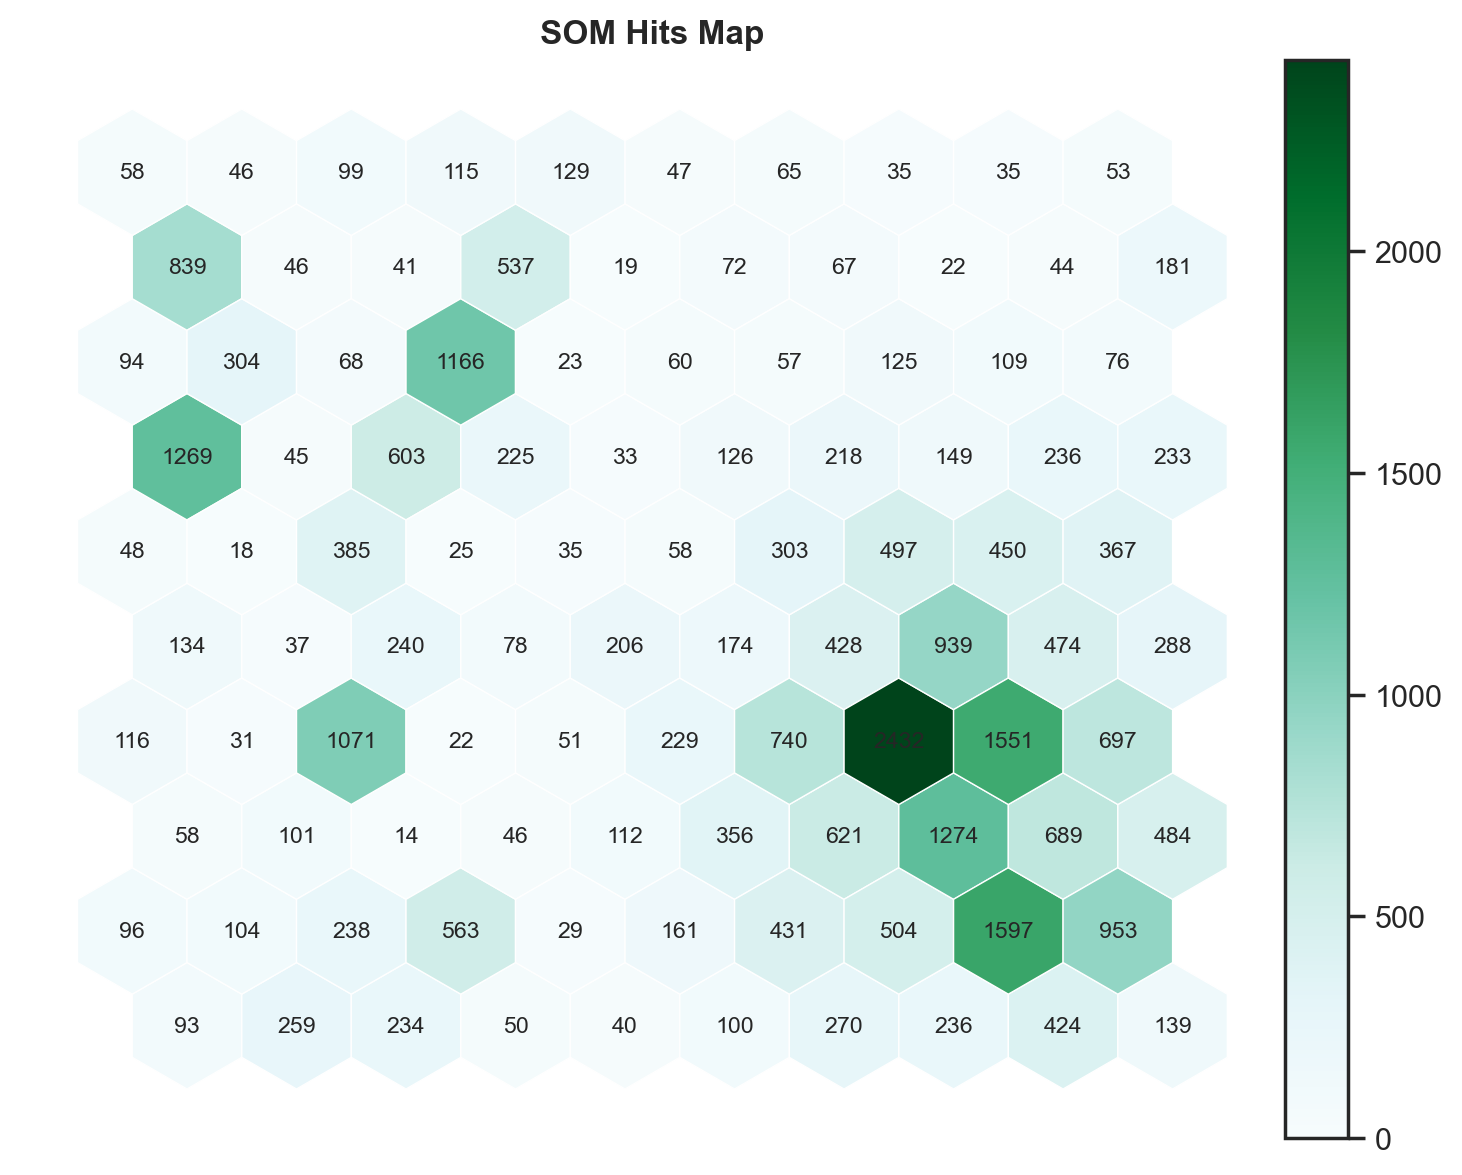

In [36]:
##############################
# Hit Map
##############################

hitsmatrix = sm.activation_response(ABCDEats[metric_features].values)

fig = plt.figure(figsize=figsize)
colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))
fig = plot_hexagons(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="SOM Hits Map",
                    cmap=cm.BuGn,
                    annot=True)

### **Quantization error:**
The quantization error is given by the average distance between a unit and the data points mapped to it i.e. all the input data points that share it as BMU.

$$q_e = \frac{\sum_{i=0}^{N_e}||x_i - w_e||}{N_e}$$

$$Q = \frac{\sum_{e=0}^Eq_e}{E}$$
, where:

- $Q$ is the overall quantization error of SOM,
- $q_e$ is the quantization error for unit $e$,
- $x_i$ is a data point/ observation,
- $w_e$ is the unit $e$ representation in the input space,
- $N_e$ is number of data points mapped to unit $e$,
- $E$ is the number of units in the SOM grid

In [37]:
# Calculate the quantization error
sm.quantization_error(ABCDEats[metric_features].values)

28.752654549392147

<div class="alert alert-block alert-info" style="font-size:20px;">

> Não faço ideia se aquilo que pus a seguir está certo ! 🤷‍♂


</div>

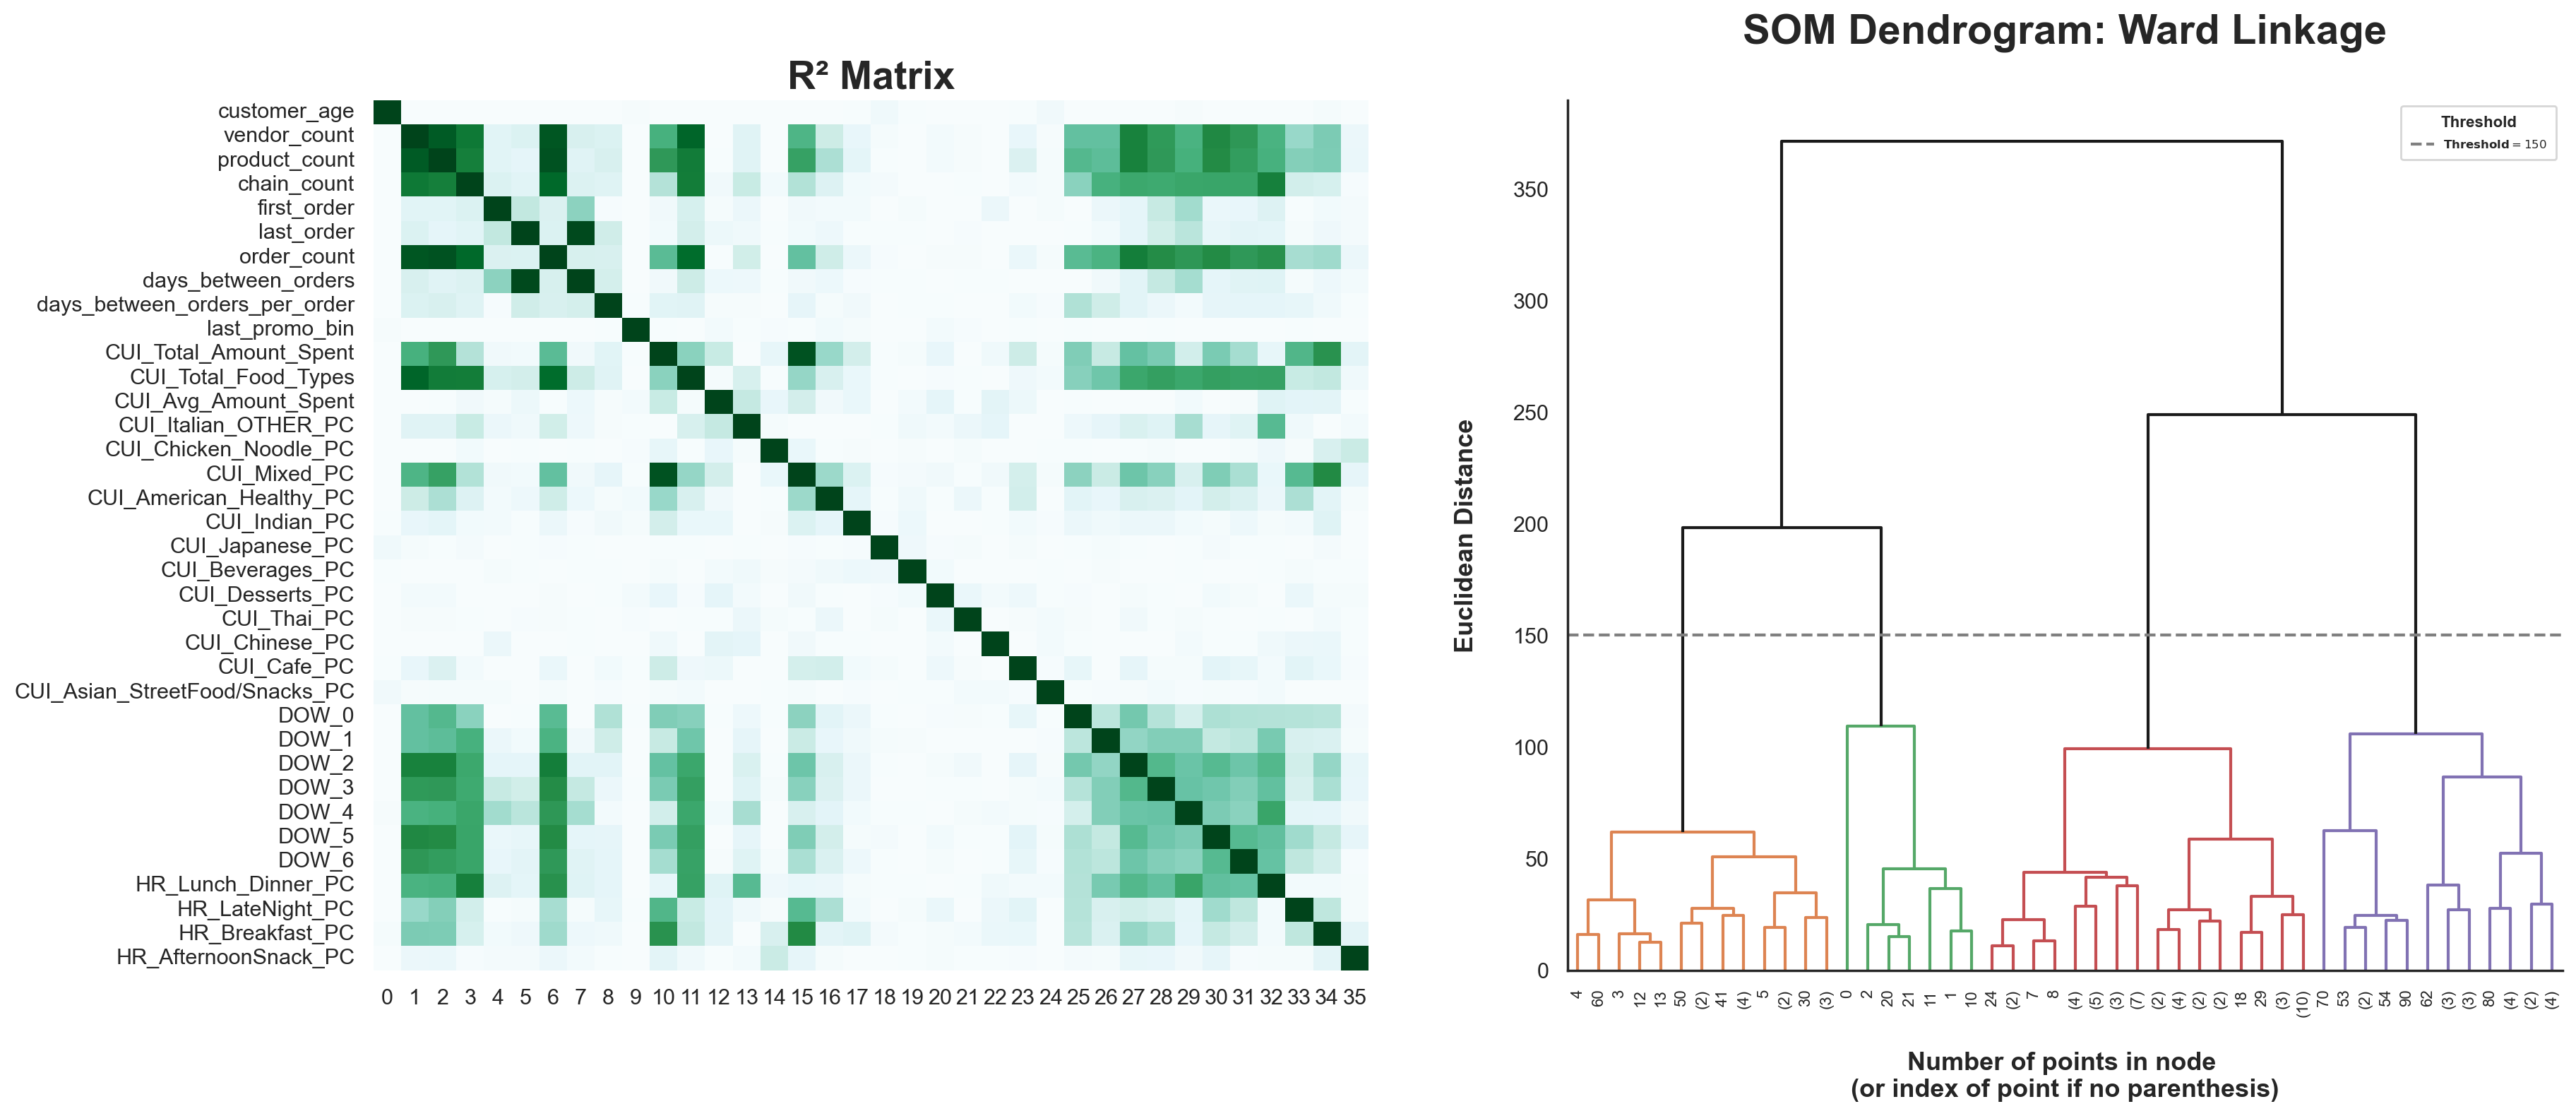

In [54]:
# R² plot and the Dendrogram

# Calculate the R² matrix
r2_matrix = np.zeros((len(metric_features), len(metric_features)))

for i in range(len(metric_features)):
    for j in range(len(metric_features)):
        r2_matrix[i, j] = np.corrcoef(sm.get_weights()[:, :, i].reshape(-1), sm.get_weights()[:, :, j].reshape(-1))[0, 1] ** 2
        
# Plot the R² matrix
fig, ax = plt.subplots(figsize=(20, 8), nrows=1, ncols=2)

sns.heatmap(r2_matrix, cmap='BuGn', ax=ax[0], cbar=False)
ax[0].set_title('R² Matrix', fontsize=20, fontweight='bold')
ax[0].set_yticklabels(metric_features, rotation=0)

# --------------------------------------------------------------------------------------------
# Calculate the linkage matrix - Ward Linkage (default) and distace = euclidean
Z = linkage(sm.get_weights().reshape(-1, len(metric_features)), 'ward')

# Plot the dendrogram
y_threshold = 150
dendrogram(Z, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k', ax=ax[1])
plt.hlines(y_threshold, 0, 1000, colors="grey", linestyles="dashed", label=rf'$\mathbf{{Threshold}} = {y_threshold}$', linewidth=1.5)
plt.title(f'SOM Dendrogram: Ward Linkage\n', fontsize=21, fontweight='bold')
plt.xlabel('\nNumber of points in node \n(or index of point if no parenthesis)', fontsize=13, fontweight='bold')
plt.ylabel(f'Euclidean Distance\n', fontsize=13, fontweight='bold')
plt.legend(title='Threshold', title_fontproperties={'weight':'bold', 'size':'8'}, labelspacing=0.8, borderpad=0.8, loc='upper right', fontsize=6)
sns.despine(right=True, top=True, ax=ax[1])
plt.show()

---

### **K-Means on top of SOM units**

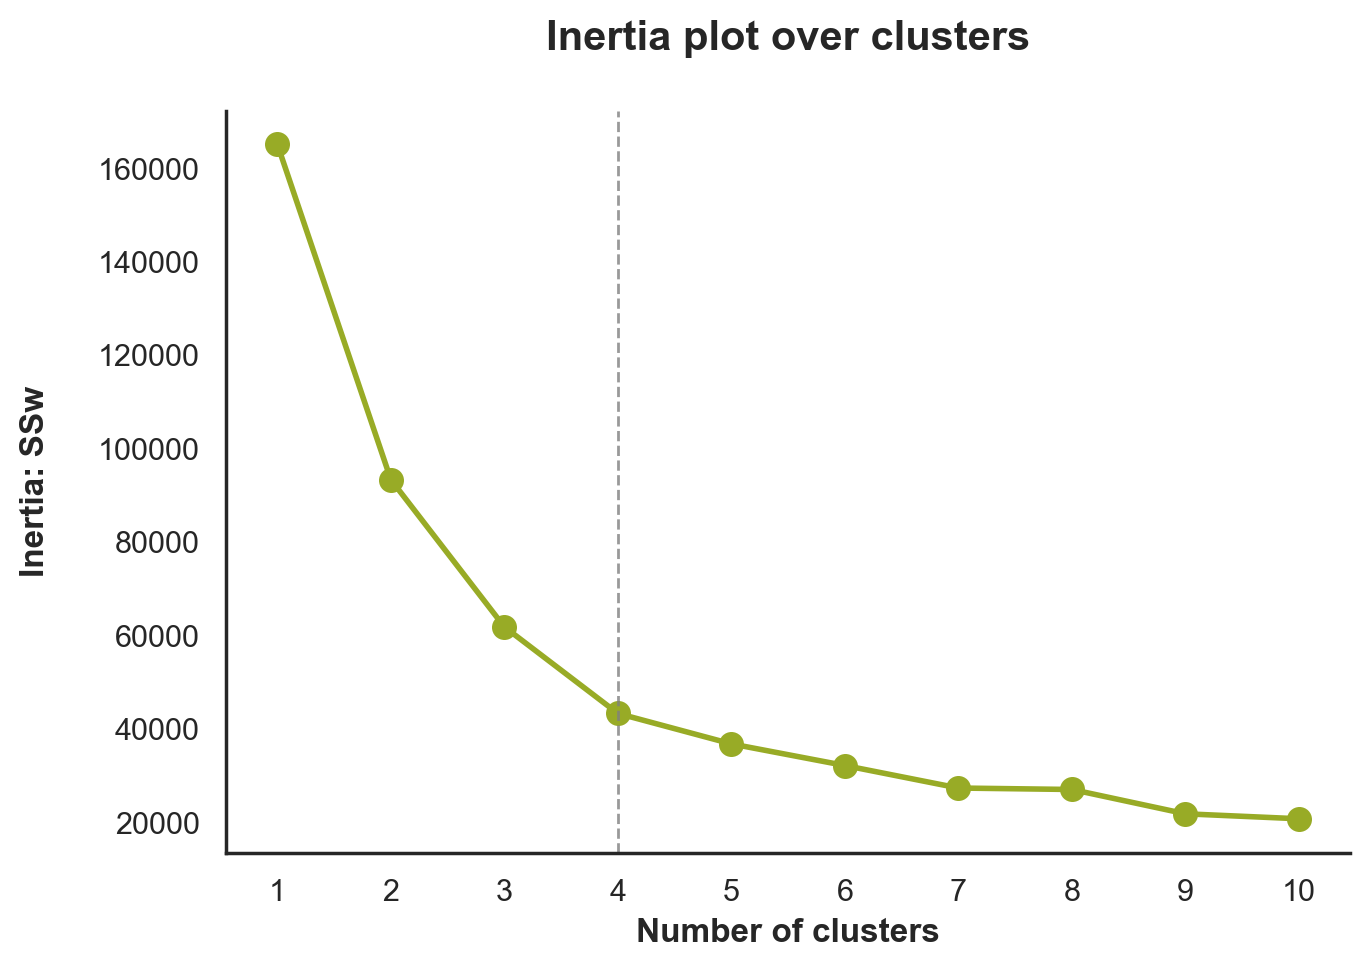

In [59]:
# UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
import warnings
warnings.filterwarnings('ignore')

# OR use the following code to avoid the warning
# import os
# os.environ['OMP_NUM_THREADS'] = '1'

# Inertia Plot
range_clusters = range(1, 11)
inertia = []
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(sm.get_weights().reshape(-1, len(metric_features)))
    inertia.append(kmeans.inertia_)

# Plot the inertia
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(range_clusters, inertia, marker='o', color = NOVAIMS_palette_colors[1], linewidth=2, markersize=8)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw\n", size=12, weight='bold')
ax.set_xlabel("Number of clusters", size=12, weight='bold')
ax.set_title("Inertia plot over clusters\n", size=15, weight='bold')

# Add the number of clusters chosen
ax.axvline(x=4, color='grey', linestyle='--', linewidth=1, alpha=0.8)

sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig('./Clustering_Outputs/SOM&KMeans_InertiaPlot.png', dpi=300, bbox_inches='tight')
plt.show()

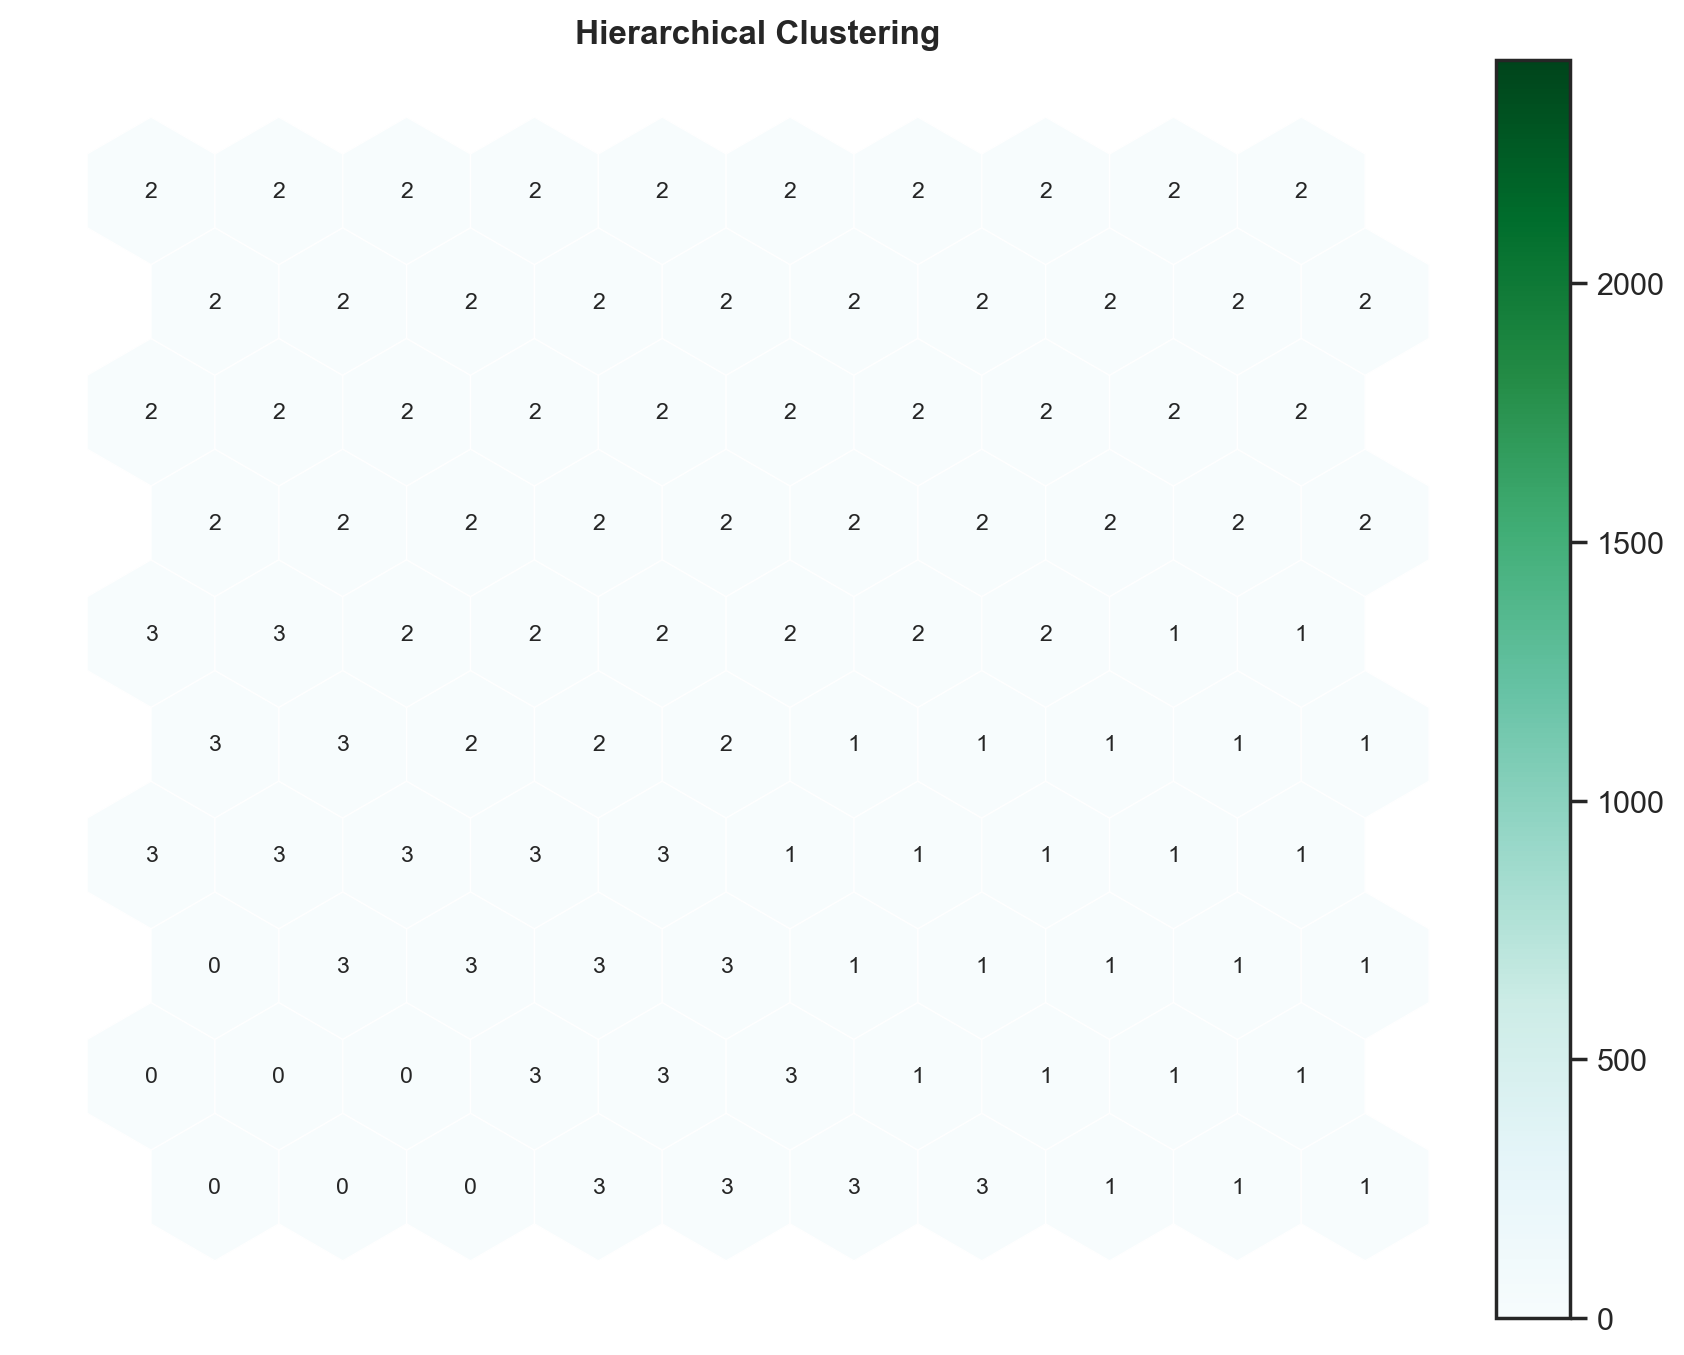

In [68]:
# Get the weights of the SOM
weights = sm.get_weights().reshape((M*N),len(metric_features))
weights.shape

# Perform Hierarchical clustering on top of the MxN units 
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(weights)
hclust_matrix = nodeclus_labels.reshape((M,N))

plot_hexagons(sm, plt.figure(figsize=(10, 10)), 
              colornorm,
              hclust_matrix,
              label="Hierarchical Clustering",
              cmap=cm.BuGn, annot=True)
plt.show()

In [ ]:
## This gets BMU coordinates, e.g. (4,4) for each data point
bmu_index = np.array([sm.winner(x) for x in ABCDEats[metric_features].values])
print(bmu_index.shape)
bmu_index

In [ ]:
## This gets the cluster label from hclust_matrix, i.e.
## if data row 0 has BMU at (37, 28) 
## it will get the label associated to node (37,28) using label associated to hclust_matrix[37,28] above

som_final_labels = [hclust_matrix[i[0]][i[1]] for i in bmu_index]

In [ ]:
df_final = pd.concat([ABCDEats, pd.Series(som_final_labels, name='label', index=df.index)], axis=1)

df_final

### **Analysing the appropriateness of our solution**


In [ ]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_final[metric_features])  # get total sum of squares
ssw_labels = df_final[metric_features.to_list() + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

---

## **📏 Clustering Evaluation/Analysis**

---